# Time- and zonal-mean layer thicknesses and meridional transport

This notebook is converted from plt_h_vh_rho.py, which visualizes the time- and zonal-mean layer thicknesses (h_rho) and meridional volume transport (vh_rho) in the density space. 

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [3]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog_rho.nc','r')

In [4]:
xq = data.variables['xq'][:]   # u
yh = data.variables['yh'][:]   # u,temp
xh = data.variables['xh'][:]   # v,temp
yq = data.variables['yq'][:]   # v
rhol = data.variables['02_l'][0:-1]

ATTENTION: The last number in rhol is very misleading as it it the average of the maximum and minimum density. It has to be excluded otherwise the plots would be very weird. Correspondingly, when reading h_rho and vh_rho, I also exclude the last index for the second dimension (02_l).

In [5]:
h_rho4  = data.variables['h_rho'][:,0:-1,:,:]
vh_rho4 = data.variables['vh_rho'][:,0:-1,:,:]
vh_rho4 = vh_rho4.filled(np.nan)
h_rho4[h_rho4 > 4000.] = 0.0

Time-mean:

In [6]:
h_rho3  = np.nanmean(h_rho4,axis=0)
vh_rho3 = np.nanmean(vh_rho4,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Zonal-mean:

In [7]:
h_rho2  = np.nanmean(h_rho3,axis=-1)
vh_rho2 = np.nanmean(vh_rho3,axis=-1)

The density larger seem to be assigned the last (largest) layer thickness, you'd have to look at outputs to tell.

In [8]:
[nz,ny] = np.shape(h_rho2)
for j in xrange(0,ny):
    for k in xrange(nz-1,0,-1):
        if h_rho2[k,j] == h_rho2[k-1,j]:
            h_rho2[k,j] = 0.0

In [9]:
h_rho2[h_rho2<2.5]=np.nan
vh_rho2[np.isnan(h_rho2)==True]=np.nan

In [10]:
h_sum   = np.nansum(h_rho2,axis=0)

Plot layer thicknesses:

In [12]:
%matplotlib inline

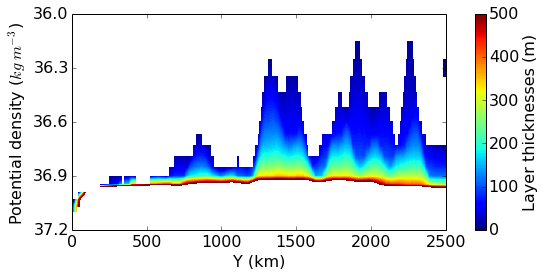

In [13]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(0,500+5,5)
h_ticks = np.arange(0,500+100,100)

pc = plt.contourf(yh,rhol,h_rho2,cmap=plt.cm.jet,levels=h_level)
c  = plt.colorbar(pc,ticks=h_ticks)

plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([1036.0,1037.2])
plt.gca().set_yticks(np.arange(1036.0,1037.2 + 0.3,0.3))
plt.gca().set_yticklabels(['36.0','36.3','36.6','36.9','37.2'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
c.ax.set_position([0.85,0.2,0.03,0.6])
c.set_label('Layer thicknesses (m)',y=0.5,fontsize=16)
c.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_h_rho_y50.png',dpi=600)

plt.show()

Plot meridional volume transport:

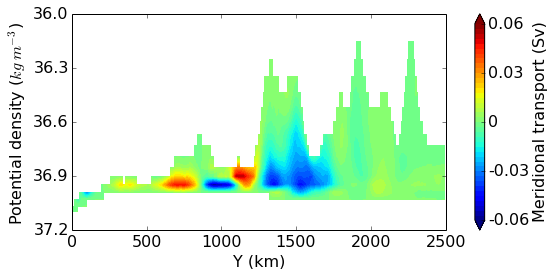

In [15]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-0.06e+6,0.06e+6+0.003e+6,0.003e+6)
vh_ticks = np.arange(-0.06e+6,0.06e+6+0.03e+6,0.03e+6)

pc = plt.contourf(yq,rhol,vh_rho2,cmap=plt.cm.jet,levels=vh_level,extend='both')
c  = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([1036.0,1037.2])
plt.gca().set_yticks(np.arange(1036.0,1037.2 + 0.3,0.3))
plt.gca().set_yticklabels(['36.0','36.3','36.6','36.9','37.2'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
c.ax.set_position([0.85,0.2,0.03,0.6])
c.ax.set_yticklabels(['-0.06','-0.03','0','0.03','0.06'])
c.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
c.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_vh_rho_y50.png',dpi=600)

plt.show()